In [1]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv("Fraud_check.csv")
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
data = data.drop({'Undergrad','Marital.Status','Urban'},axis =1)
data

,Taxable.Income,City.Population,Work.Experience
0,68833,50047,10
1,33700,134075,18
2,36925,160205,30
3,50190,193264,15
4,81002,27533,28
...,...,...,...
595,76340,39492,7
596,69967,55369,2
597,47334,154058,0
598,98592,180083,17


In [4]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


<AxesSubplot:>

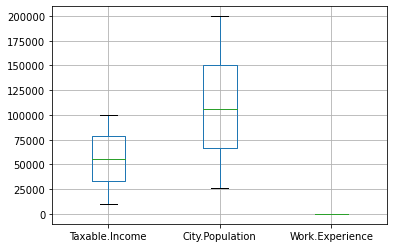

In [5]:
data.boxplot()

In [6]:
x = data.iloc[:,0:3]
y =data['Taxable.Income']

In [7]:
x

,Taxable.Income,City.Population,Work.Experience
0,68833,50047,10
1,33700,134075,18
2,36925,160205,30
3,50190,193264,15
4,81002,27533,28
...,...,...,...
595,76340,39492,7
596,69967,55369,2
597,47334,154058,0
598,98592,180083,17


In [8]:
y

0      68833
1      33700
2      36925
3      50190
4      81002
       ...  
595    76340
596    69967
597    47334
598    98592
599    96519
Name: Taxable.Income, Length: 600, dtype: int64

In [9]:
colnames = list(data.columns)
colnames

['Taxable.Income', 'City.Population', 'Work.Experience']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

# Random Forest Regressor

In [12]:
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10)
model = RandomForestRegressor(n_estimators=num_trees, max_features=max_features)
model.fit(x_train,y_train)

RandomForestRegressor(max_features=3)

In [13]:
model.score(x_test,y_test)

0.9999663760028573